### Работа с форматом времени и сводными таблицами

Имеются следующие данные о транзакциях в период с 01.12.2010 по 12.09.2011:

InvoiceNo — номер транзакции  
StockCode — код товара  
Description — описание товара  
Quantity — количество единиц товара, добавленных в заказ  
InvoiceDate — дата транзакции  
UnitPrice — цена за единицу товара  
CustomerID — id клиента  
Country — страна, где проживает клиент  
Данные можно скачать отсюда.  

В данной задаче ссылка для считывания данных лежит в переменной path_to_file.  
#### 1. Импортируйте пандас и прочитайте данные с кодировкой ISO-8859-1.  
#### Запишите полученный датафрейм в retail, а названия колонок сохраните в переменную retail_columns.

In [217]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 
import warnings

Запишем путь к файлу в переменную

In [218]:
path_to_file = 'https://raw.githubusercontent.com/Vlkoz/time_format_and_pivot_tables/main/files/5_data.csv.zip'

Считаем файл

In [219]:
retail = pd.read_csv(path_to_file, compression = 'zip', encoding = 'ISO-8859-1')

In [220]:
retail_columns = retail.columns

#### 2. Проверьте, встречаются ли в данных повторяющиеся наблюдения, и в качестве ответа укажите их количество. Если они есть, то удалите их из retail.

In [221]:
old_st = retail.shape

In [222]:
old_st

(541909, 8)

Посчитаем количество строк и столбцов, удалив дубликаты

In [223]:
new_st = retail.drop_duplicates().shape

In [224]:
new_st

(536641, 8)

Перезапишем df, удалив дубликаты

In [225]:
retail=retail.drop_duplicates()

Посчитаем разницу строк между двумя df

In [226]:
dubl = old_st[0]-new_st[0]

In [227]:
dubl

5268

#### 3. ⭐️ Задание со звёздочкой! ⭐️

Данные содержат в себе записи как об успешных транзакциях, так и об отмененных. Если пользователь отменил заказ, в начале номера транзакции (InvoiceNo) ставится C (canceled). 

#### Сколько всего транзакций отменили пользователи? Каждый отдельный тип продукта считайте за отдельную транзакцию - уникальные номера считать не надо.

Возьмём строковый метод startswith чтобы отобрать отмененные заказы, посчитаем количество таких заказов

In [228]:
retail.InvoiceNo.str.startswith('C').sum()

9251

#### 4. Теперь отфильтруйте данные и оставьте в retail только те заказы, где Quantity > 0. В качестве ответа укажите число оставшихся строк.

Отберем только строки, где quantity больше нуля, перезапишем df

In [229]:
retail = retail.query("Quantity>0")

Посчитаем количество строк

In [230]:
retail.shape

(526054, 8)

#### 5. 💀 Сложное задание! 💀

#### Посчитайте число заказов для каждого пользователя (CustomerID) из Германии (Germany). Оставьте только тех, кто совершил более N транзакций (InvoiceNo), где N – 80% процентиль. Запишите полученные id пользователей в germany_top (не весь датафрейм, только id).

#### Отфильтрованные данные записаны в retail. Идентификатор заказа – InvoiceNo. Для каждого заказа в данных может встречаться более 1 строки.

Сначала применим фильтр, и возьмём клиентов из Германии  
Сгруппируем по id пользователя и посчитаем количество уникальных заказов  

In [231]:
germany_clients =retail.query("Country == 'Germany'") \
    .groupby('CustomerID', as_index = False) \
    .agg({'InvoiceNo': 'nunique'})     

В получившемся df найдем 80 процентиль по количеству заказов

In [232]:
germany_clients.InvoiceNo.quantile(q=0.8)

7.0

Отберем только тех клиентов, у которых количество покупок больше 7

In [233]:
Germany_top_cl = germany_clients.query("InvoiceNo >7") \
    .reset_index(drop=True)

Запишем id этих клиентов в переменную germany_top

In [234]:
germany_top = Germany_top_cl.CustomerID

#### 6. ⭐️ Задание со звёздочкой! ⭐️

#### Используя объект с id пользователей (germany_top), полученный на предыдущем шаге, отфильтруйте наблюдения и оставьте в данных записи только по интересующим нас юзерам. Результирующий датафрейм запишите в top_retail_germany.

#### Датафрейм записан в retail, нужные id пользователей – в germany_top .

Отберем только тех пользователей, которые записаны в переменной germany_top  
Для этого используем 'in' и '@' в query.  

In [235]:
top_retail_germany = retail.query("CustomerID in @germany_top")

In [236]:
top_retail_germany

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1109,536527,22809,SET OF 6 T-LIGHTS SANTA,6,12/1/2010 13:04,2.95,12662.0,Germany
1110,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,12/1/2010 13:04,2.55,12662.0,Germany
1111,536527,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12,12/1/2010 13:04,0.85,12662.0,Germany
1112,536527,22242,5 HOOK HANGER MAGIC TOADSTOOL,12,12/1/2010 13:04,1.65,12662.0,Germany
1113,536527,22244,3 HOOK HANGER MAGIC GARDEN,12,12/1/2010 13:04,1.95,12662.0,Germany
...,...,...,...,...,...,...,...,...
541726,581570,22139,RETROSPOT TEA SET CERAMIC 11 PC,3,12/9/2011 11:59,4.95,12662.0,Germany
541727,581570,23077,DOUGHNUT LIP GLOSS,20,12/9/2011 11:59,1.25,12662.0,Germany
541728,581570,20750,RED RETROSPOT MINI CASES,2,12/9/2011 11:59,7.95,12662.0,Germany
541729,581570,22505,MEMO BOARD COTTAGE DESIGN,4,12/9/2011 11:59,4.95,12662.0,Germany


#### 7. Сгруппируйте top_retail_germany по коду товара (StockCode).  
#### Какой из продуктов добавляли в корзину чаще всего, кроме POST? 

#### Note: одним заказом считается единовременная покупка любого количества товара, т.е. без учета Quantity.

Посмотрим по каждому коду товара количество добавлений в корзину.  
Отсортируем по убыванию

In [237]:
top_retail_germany.groupby('StockCode') \
    .agg({'Description': 'count'}) \
    .sort_values('Description', ascending = False)

,Description
StockCode,
POST,213
22326,52
22328,38
22423,34
20719,30
...,...
22563,1
22569,1
22574,1


#### 8. Вернемся к анализу полного датасета retail. Создайте колонку Revenue с суммой покупки, используя колонки Quantity и UnitPrice.

#### Отфильтрованные данные записаны в retail.

Создадим колонку Revenue, перемножив колонки Quantity и UnitPrice

In [238]:
retail['Revenue'] = retail.Quantity * retail.UnitPrice
warnings.filterwarnings('ignore')

In [239]:
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60


#### 9. Для каждой транзакции (InvoiceNo), посчитайте финальную сумму заказа. В качестве ответа укажите топ-5 (InvoiceNo) по сумме заказа (через запятую с пробелом и в порядке убывания TotalRevenue)

Найдем топ 5, сложив выручку по каждой транзакции  
Отсортируем по убыванию  
Выведем первые 5 значений

In [240]:
retail.groupby('InvoiceNo', as_index = False) \
    .agg({'Revenue': 'sum'}) \
    .rename(columns= {'Revenue': 'TotalRevenue'}) \
    .sort_values('TotalRevenue', ascending = False) \
    .reset_index(drop= True) \
    .head(5)

,InvoiceNo,TotalRevenue
0,581483,168469.60
1,541431,77183.60
2,574941,52940.94
3,576365,50653.91
4,556444,38970.00


#### 10. Имеются следующие данные:

date – дата (2020-03-02 00:00:00 – 2020-03-02 01:29:05)  
name – имя пользователя  
transaction – статус транзакции  
minute* – сколько минут прошло с начала дня  

#### Загрузите датасет transaction_data.csv. Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.

#### Вопрос: сколько в датасете пропущенных значений?

Загрузим датасет

In [241]:
df = pd.read_csv('https://raw.githubusercontent.com/Vlkoz/time_format_and_pivot_tables/main/files/transaction_data.csv')

Посчитаем количество строк и столбцов

In [242]:
df.shape

(5315, 3)

Посмотрим типы переменных

In [243]:
df.dtypes

date           object
name           object
transaction    object
dtype: object

Посмотрим количество пропущенных значений

In [244]:
df.isna().sum()

date           0
name           0
transaction    0
dtype: int64

Посмотрим описательную статистику

In [245]:
df.describe()

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:33:10,Masha_Ozerova,successfull
freq,6,112,3692


#### 11. Проверьте, какие значения принимает колонка transaction . Сколько наблюдений относятся к тому или иному уровню?  Визуализируйте результат с помощью барплота.

#### Вопрос: расположите уровни переменной в порядке убывания числа относящихся наблюдений (от большего к меньшему)

Посмотрим какие значения и какое количество в колонке 'transaction'  
Построим график

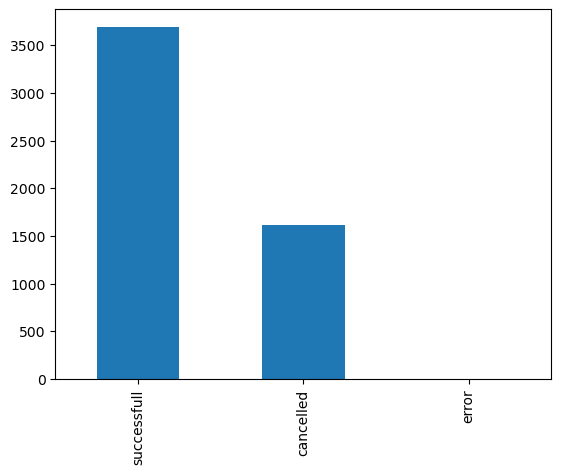

In [246]:
df.transaction.value_counts().plot.bar()
plt.show()

#### 12. Сколько произошло ошибок? 

Посмотрим на число ошибок

In [247]:
df.transaction.value_counts()

successfull    3692
cancelled      1619
error             4
Name: transaction, dtype: int64

#### 13. Сколько транзакций осуществил каждый из пользователей?  
#### Осуществлёнными считаются транзакции со значением successfull

Посмотрите на характеристики распределения, а затем постройте гистограмму числа успешных транзакций, совершённых каждым пользователем, где  

по оси x – число транзакций  
по оси y – доля пользователей с таким числом транзакций  
Выберите верные утверждения.  


 • Пользователи в среднем совершили примерно по 66 транзакций  
 • Максимальное число транзакций – 82  
 • Пользователи в среднем совершили по 64 транзакции  
 • Примерно 25% пользователей совершили менее 61 транзакции  
 • Примерно 25% пользователей совершили более 61 транзакции  
 • Пользователи в среднем совершили примерно по 56 транзакций  
 • Максимальное число транзакций – 112  
 • Пользователи в среднем совершили примерно по 94 транзакции  


Отберём только успешные транзакции  
Посчитаем по каждому человеку  
Отсортируем по убыванию  

In [248]:
successfell_transaction =df.query("transaction == 'successfull'") \
    .groupby('name', as_index = False) \
    .agg({'transaction': 'count'}) \
    .sort_values('transaction', ascending = False) \
    .rename (columns = {'transaction': 'successfell_transaction'}) \
    .reset_index (drop= True)

In [249]:
successfell_transaction.head()

,name,successfell_transaction
0,Svetlana_Smirnova,82
1,Olga_Smirnova,80
2,Masha_Ozerova,80
3,Svetlana_Ivanova,79
4,Svetlana_Polyanova,78


Зададим размер графика  
Укажем колонку df, которую необходимо визуализировать  

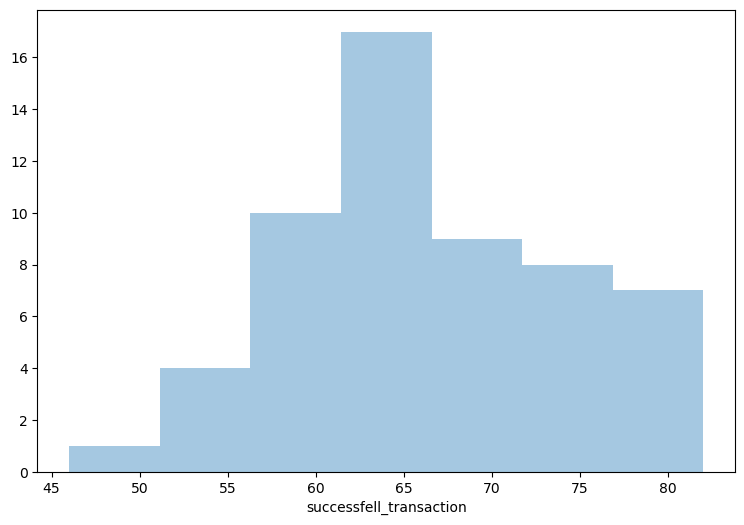

In [250]:
plt.figure(figsize= (9,6))
sns.distplot(successfell_transaction.successfell_transaction, kde = False)
plt.show()

Таким образом, верны утверждения:   

• Пользователи в среднем совершили примерно по 66 транзакций  
• Максимальное число транзакций – 82  
• Примерно 25% пользователей совершили менее 61 транзакции  

#### 14. 💀 Сложное задание! 💀

#### К вам пришёл коллега с немного обновленными данными. Постройте сводную таблицу user_vs_minute_pivot, где:  

столбцы – имена пользователей  
строки – минута времени осуществления операции (minute)  
значения – число совершённых операций  
Пропущенные значения заполните нулями.  

#### Note: фильтровать успешные транзакции не нужно - постройте табличку по всем  

#### Новые данные сохранены в df.   

Считаем обновленный df

In [251]:
df = pd.read_csv('https://raw.githubusercontent.com/Vlkoz/time_format_and_pivot_tables/main/files/transaction_data_updated.csv')

Сгруппируем по имени и минутам  
Посчитаем количество операций по минутам  
Воспользуемся методом pivot, зададим нужные нам значения  
Заполним пропущенные значения нулями  

In [252]:
user_vs_minute_pivot = df.groupby(['name', 'minute'], as_index = False) \
    .agg({'date': 'count'}) \
    .rename (columns = {'date': 'amount'}) \
    .pivot(index = 'minute', columns = 'name', values = 'amount') \
    .reset_index(drop = True) \
    .fillna(0)

In [253]:
user_vs_minute_pivot.head()

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0


#### 15. Посчитайте число минут, прошедших с начала дня. Результат сохраните в колонку true_minute. Постройте график и посмотрите, произошли ли изменения (график в код включать не нужно).

Например:  

date                name               transaction  minute  true_minute  
2020-03-02 00:37:20 Ekaterina_Petrova  cancelled    37      37  
2020-03-02 01:06:14 Ekaterina_Smirnova successfull  6       66  

#### Данные записаны в df , колонка date прочитана как дата.   

Переведем колонку date в формат даты

In [254]:
df['date'] = pd.to_datetime(df ['date'])

Извлечем из даты часы и умножим их на 60, чтобы перевести в минуты, прибавим колонку с минутами  
Получившийся результат поместим в колонку true_minute  

In [255]:
df['true_minute'] = df.date.dt.hour*60 +df.minute

Построим дисплот

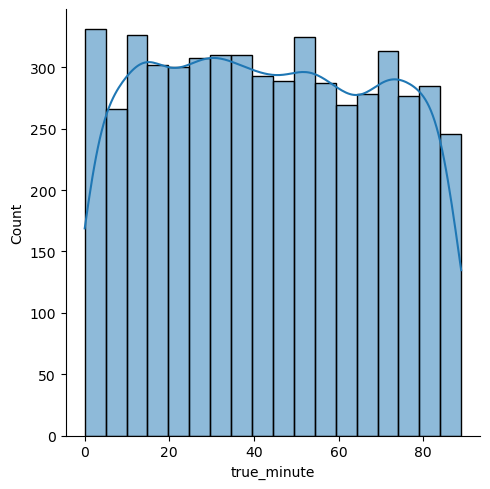

In [256]:
sns.displot(data = df, x= 'true_minute', kde= True)
plt.show()